In [35]:
## Import all diferent libraries
import os, sys

if os.path.basename(os.getcwd()) == 'notebooks':
    os.chdir('../')
    sys.path.insert(0, 'src/')

import numpy as np
import pandas as pd
import glob
import yaml
import pprint
from datetime import datetime
from scipy.stats import ttest_ind
import seaborn as sns
from matplotlib import pyplot as plt
import re
from pathlib import Path

In [23]:
##gets access to file path and gets data
paths = yaml.load(open('../../../paths.yaml', 'r'), Loader=yaml.FullLoader)

DATA_FOLDER = paths['data'] + '2021-08-post-mortem-biologic-pc/'
FILE_GROUP_REGEX_LIST = ['*coin*cell2*hppc*.mpt*']
## sorts every file that has coin and hppc in the folder. datafolder is a path to the folder 
file_paths = [sorted(glob.glob(f'{DATA_FOLDER}{f}')) for f in FILE_GROUP_REGEX_LIST]

file_paths

[['/Users/iaro/project/data/2021-08-post-mortem-biologic-pc/20210819_coin_nmc111_cell2_hppc_CA2.mpt',
  '/Users/iaro/project/data/2021-08-post-mortem-biologic-pc/20210822_coin_nmc111_cell2_hppc_2_CA2.mpt']]

In [15]:
## now my idea is to make a loop that goes through every path and gets all the dataframes to print the graphs
## problem- not all files have same number of rows to skip. Seems to be solved with few if statements for now

In [16]:
def VoltageCurrent(df1, file2):
    cycles_num=np.unique(df1['cycle number'])
    Time=[]
    Voltage=[]
    Current=[]
    for f in cycles_num:
        plt.figure()
        i=np.where(df1['cycle number']==f)
        plt1 =plt.subplot()
        plt2=plt1.twinx()
        Time.append(df1['time/s'].iloc[i]/60)
        Voltage.append(df1['Ecell/V'].iloc[i])
        Current.append(df1['I/mA'].iloc[i])
        plt1.plot(Time[0],Voltage[0], color= 'k')
        plt1.set_xlabel("Time(min)")
        plt1.set_ylabel("Voltage (V)")
        plt2.set_ylabel("Current (mA)")
        plt.title(file2)
        plt2.plot(Time[0],Current[0],color= 'r', ls=':')
        Time.clear()
        Voltage.clear()
        Current.clear()

In [17]:
def Resistance(df1):
    cycles_num=np.unique(df1['cycle number'])
    Time=[]
    Voltage=[]
    Current=[]
    #Resistance=[]
    for a in cycles_num:
        plt.figure()
        i=np.where(df1['cycle number']==a)
        Time.append(abs(df1['time/s'].iloc[i]/60))
        Voltage.append(df1['Ecell/V'].iloc[i])
        Current.append(df1['I/mA'].iloc[i])
        #for k in Current:
         #   if Current[0][k] !=0:
         #       Resistance.append(1000*Voltage[0][k]/Current[0][k])
         #   else:
         #       Resistance.append(0)
        plt.plot(1000*Voltage[0]/Current[0] , Time[0], linewidth=4.0 )
        plt.xlabel('Time(min)')
        plt.ylabel('Resistance($\Omega$)')
        plt.title( str(a) + ' Cycle.')
        Time.clear()
        Voltage.clear()
        Current.clear()
        #Resistance.clear()

In [36]:
def HppcResist(df1):
    cycles_num=np.unique(df1['cycle number'])
    Time=[]
    Voltage=[]
    Current=[]
    Resistance=[]  
    Resistance.append(cycles_num[-1])
    full_capacity=0
    for f in cycles_num:
        i=np.where(df1['cycle number']==f)
        for d in i[0]:
            if df1.loc[d,'I/mA'] < -0.000001 and df1.loc[d,'I/mA'] > -0.2:
#                   print(df1['I/mA'].iloc[k])
                Time.append(df1['time/s'].iloc[d])
                Voltage.append(df1['Ecell/V'].iloc[d])
                Current.append(df1['I/mA'].iloc[d])
#   print(Current) 
## I checked that my code gets exactly what I need. I get the first and last value of my dataframe and divide by the current
        
        x=Voltage[len(Voltage)-1]
        y=Voltage[0]
        z=Current[0]
        Resistance.append((x-y)/z)
        Time.clear()
        Voltage.clear()
        Current.clear()
    return Resistance
## code cuts dataframe in cycles for each cycle finds where current was applied, Stores current and voltage during 
## these occurences and gives back the array final resistances for each cycle 

    

(array([0]),)
(array([1]),)
(array([2]),)
(array([3]),)
(array([4]),)
(array([5]),)
(array([6]),)
(array([7]),)
(array([8]),)
(array([9]),)
(array([10]),)
(array([11]),)
(array([12]),)
(array([13]),)
(array([14]),)
(array([15]),)
(array([16]),)
(array([17]),)
(array([18]),)
(array([19]),)
(array([20]),)
(array([21]),)
(array([22]),)
(array([23]),)
(array([24]),)
(array([25]),)
(array([26]),)
(array([27]),)
(array([28]),)
(array([29]),)
(array([30]),)
(array([31]),)
(array([32]),)
(array([33]),)
(array([34]),)
(array([35]),)
(array([36]),)
(array([37]),)
(array([38]),)
(array([39]),)
(array([40]),)
(array([41]),)
(array([42]),)
(array([43]),)
(array([44]),)
(array([45]),)
(array([46]),)
(array([47]),)
(array([48]),)
(array([49]),)
(array([50]),)
(array([51]),)
(array([52]),)
(array([53]),)
(array([54]),)
(array([55]),)
(array([56]),)
(array([57]),)
(array([58]),)
(array([59]),)
(array([60]),)
(array([61]),)
(array([62]),)
(array([63]),)
(array([64]),)
(array([65]),)
(array([66]),)
(arra

(array([534]),)
(array([535]),)
(array([536]),)
(array([537]),)
(array([538]),)
(array([539]),)
(array([540]),)
(array([541]),)
(array([542]),)
(array([543]),)
(array([544]),)
(array([545]),)
(array([546]),)
(array([547]),)
(array([548]),)
(array([549]),)
(array([550]),)
(array([551]),)
(array([552]),)
(array([553]),)
(array([554]),)
(array([555]),)
(array([556]),)
(array([557]),)
(array([558]),)
(array([559]),)
(array([560]),)
(array([561]),)
(array([562]),)
(array([563]),)
(array([564]),)
(array([565]),)
(array([566]),)
(array([567]),)
(array([568]),)
(array([569]),)
(array([570]),)
(array([571]),)
(array([572]),)
(array([573]),)
(array([574]),)
(array([575]),)
(array([576]),)
(array([577]),)
(array([578]),)
(array([579]),)
(array([580]),)
(array([581]),)
(array([582]),)
(array([583]),)
(array([584]),)
(array([585]),)
(array([586]),)
(array([587]),)
(array([588]),)
(array([589]),)
(array([590]),)
(array([591]),)
(array([592]),)
(array([593]),)
(array([594]),)
(array([595]),)
(array([

(array([1194]),)
(array([1195]),)
(array([1196]),)
(array([1197]),)
(array([1198]),)
(array([1199]),)
(array([1200]),)
(array([1201]),)
(array([1202]),)
(array([1203]),)
(array([1204]),)
(array([1205]),)
(array([1206]),)
(array([1207]),)
(array([1208]),)
(array([1209]),)
(array([1210]),)
(array([1211]),)
(array([1212]),)
(array([1213]),)
(array([1214]),)
(array([1215]),)
(array([1216]),)
(array([1217]),)
(array([1218]),)
(array([1219]),)
(array([1220]),)
(array([1221]),)
(array([1222]),)
(array([1223]),)
(array([1224]),)
(array([1225]),)
(array([1226]),)
(array([1227]),)
(array([1228]),)
(array([1229]),)
(array([1230]),)
(array([1231]),)
(array([1232]),)
(array([1233]),)
(array([1234]),)
(array([1235]),)
(array([1236]),)
(array([1237]),)
(array([1238]),)
(array([1239]),)
(array([1240]),)
(array([1241]),)
(array([1242]),)
(array([1243]),)
(array([1244]),)
(array([1245]),)
(array([1246]),)
(array([1247]),)
(array([1248]),)
(array([1249]),)
(array([1250]),)
(array([1251]),)
(array([1252])

(array([2109]),)
(array([2110]),)
(array([2111]),)
(array([2112]),)
(array([2113]),)
(array([2114]),)
(array([2115]),)
(array([2116]),)
(array([2117]),)
(array([2118]),)
(array([2119]),)
(array([2120]),)
(array([2121]),)
(array([2122]),)
(array([2123]),)
(array([2124]),)
(array([2125]),)
(array([2126]),)
(array([2127]),)
(array([2128]),)
(array([2129]),)
(array([2130]),)
(array([2131]),)
(array([2132]),)
(array([2133]),)
(array([2134]),)
(array([2135]),)
(array([2136]),)
(array([2137]),)
(array([2138]),)
(array([2139]),)
(array([2140]),)
(array([2141]),)
(array([2142]),)
(array([2143]),)
(array([2144]),)
(array([2145]),)
(array([2146]),)
(array([2147]),)
(array([2148]),)
(array([2149]),)
(array([2150]),)
(array([2151]),)
(array([2152]),)
(array([2153]),)
(array([2154]),)
(array([2155]),)
(array([2156]),)
(array([2157]),)
(array([2158]),)
(array([2159]),)
(array([2160]),)
(array([2161]),)
(array([2162]),)
(array([2163]),)
(array([2164]),)
(array([2165]),)
(array([2166]),)
(array([2167])

(array([2750]),)
(array([2751]),)
(array([2752]),)
(array([2753]),)
(array([2754]),)
(array([2755]),)
(array([2756]),)
(array([2757]),)
(array([2758]),)
(array([2759]),)
(array([2760]),)
(array([2761]),)
(array([2762]),)
(array([2763]),)
(array([2764]),)
(array([2765]),)
(array([2766]),)
(array([2767]),)
(array([2768]),)
(array([2769]),)
(array([2770]),)
(array([2771]),)
(array([2772]),)
(array([2773]),)
(array([2774]),)
(array([2775]),)
(array([2776]),)
(array([2777]),)
(array([2778]),)
(array([2779]),)
(array([2780]),)
(array([2781]),)
(array([2782]),)
(array([2783]),)
(array([2784]),)
(array([2785]),)
(array([2786]),)
(array([2787]),)
(array([2788]),)
(array([2789]),)
(array([2790]),)
(array([2791]),)
(array([2792]),)
(array([2793]),)
(array([2794]),)
(array([2795]),)
(array([2796]),)
(array([2797]),)
(array([2798]),)
(array([2799]),)
(array([2800]),)
(array([2801]),)
(array([2802]),)
(array([2803]),)
(array([2804]),)
(array([2805]),)
(array([2806]),)
(array([2807]),)
(array([2808])

(array([3254]),)
(array([3255]),)
(array([3256]),)
(array([3257]),)
(array([3258]),)
(array([3259]),)
(array([3260]),)
(array([3261]),)
(array([3262]),)
(array([3263]),)
(array([3264]),)
(array([3265]),)
(array([3266]),)
(array([3267]),)
(array([3268]),)
(array([3269]),)
(array([3270]),)
(array([3271]),)
(array([3272]),)
(array([3273]),)
(array([3274]),)
(array([3275]),)
(array([3276]),)
(array([3277]),)
(array([3278]),)
(array([3279]),)
(array([3280]),)
(array([3281]),)
(array([3282]),)
(array([3283]),)
(array([3284]),)
(array([3285]),)
(array([3286]),)
(array([3287]),)
(array([3288]),)
(array([3289]),)
(array([3290]),)
(array([3291]),)
(array([3292]),)
(array([3293]),)
(array([3294]),)
(array([3295]),)
(array([3296]),)
(array([3297]),)
(array([3298]),)
(array([3299]),)
(array([3300]),)
(array([3301]),)
(array([3302]),)
(array([3303]),)
(array([3304]),)
(array([3305]),)
(array([3306]),)
(array([3307]),)
(array([3308]),)
(array([3309]),)
(array([3310]),)
(array([3311]),)
(array([3312])

(array([3945]),)
(array([3946]),)
(array([3947]),)
(array([3948]),)
(array([3949]),)
(array([3950]),)
(array([3951]),)
(array([3952]),)
(array([3953]),)
(array([3954]),)
(array([3955]),)
(array([3956]),)
(array([3957]),)
(array([3958]),)
(array([3959]),)
(array([3960]),)
(array([3961]),)
(array([3962]),)
(array([3963]),)
(array([3964]),)
(array([3965]),)
(array([3966]),)
(array([3967]),)
(array([3968]),)
(array([3969]),)
(array([3970]),)
(array([3971]),)
(array([3972]),)
(array([3973]),)
(array([3974]),)
(array([3975]),)
(array([3976]),)
(array([3977]),)
(array([3978]),)
(array([3979]),)
(array([3980]),)
(array([3981]),)
(array([3982]),)
(array([3983]),)
(array([3984]),)
(array([3985]),)
(array([3986]),)
(array([3987]),)
(array([3988]),)
(array([3989]),)
(array([3990]),)
(array([3991]),)
(array([3992]),)
(array([3993]),)
(array([3994]),)
(array([3995]),)
(array([3996]),)
(array([3997]),)
(array([3998]),)
(array([3999]),)
(array([4000]),)
(array([4001]),)
(array([4002]),)
(array([4003])

(array([4598]),)
(array([4599]),)
(array([4600]),)
(array([4601]),)
(array([4602]),)
(array([4603]),)
(array([4604]),)
(array([4605]),)
(array([4606]),)
(array([4607]),)
(array([4608]),)
(array([4609]),)
(array([4610]),)
(array([4611]),)
(array([4612]),)
(array([4613]),)
(array([4614]),)
(array([4615]),)
(array([4616]),)
(array([4617]),)
(array([4618]),)
(array([4619]),)
(array([4620]),)
(array([4621]),)
(array([4622]),)
(array([4623]),)
(array([4624]),)
(array([4625]),)
(array([4626]),)
(array([4627]),)
(array([4628]),)
(array([4629]),)
(array([4630]),)
(array([4631]),)
(array([4632]),)
(array([4633]),)
(array([4634]),)
(array([4635]),)
(array([4636]),)
(array([4637]),)
(array([4638]),)
(array([4639]),)
(array([4640]),)
(array([4641]),)
(array([4642]),)
(array([4643]),)
(array([4644]),)
(array([4645]),)
(array([4646]),)
(array([4647]),)
(array([4648]),)
(array([4649]),)
(array([4650]),)
(array([4651]),)
(array([4652]),)
(array([4653]),)
(array([4654]),)
(array([4655]),)
(array([4656])

(array([5213]),)
(array([5214]),)
(array([5215]),)
(array([5216]),)
(array([5217]),)
(array([5218]),)
(array([5219]),)
(array([5220]),)
(array([5221]),)
(array([5222]),)
(array([5223]),)
(array([5224]),)
(array([5225]),)
(array([5226]),)
(array([5227]),)
(array([5228]),)
(array([5229]),)
(array([5230]),)
(array([5231]),)
(array([5232]),)
(array([5233]),)
(array([5234]),)
(array([5235]),)
(array([5236]),)
(array([5237]),)
(array([5238]),)
(array([5239]),)
(array([5240]),)
(array([5241]),)
(array([5242]),)
(array([5243]),)
(array([5244]),)
(array([5245]),)
(array([5246]),)
(array([5247]),)
(array([5248]),)
(array([5249]),)
(array([5250]),)
(array([5251]),)
(array([5252]),)
(array([5253]),)
(array([5254]),)
(array([5255]),)
(array([5256]),)
(array([5257]),)
(array([5258]),)
(array([5259]),)
(array([5260]),)
(array([5261]),)
(array([5262]),)
(array([5263]),)
(array([5264]),)
(array([5265]),)
(array([5266]),)
(array([5267]),)
(array([5268]),)
(array([5269]),)
(array([5270]),)
(array([5271])

(array([6142]),)
(array([6143]),)
(array([6144]),)
(array([6145]),)
(array([6146]),)
(array([6147]),)
(array([6148]),)
(array([6149]),)
(array([6150]),)
(array([6151]),)
(array([6152]),)
(array([6153]),)
(array([6154]),)
(array([6155]),)
(array([6156]),)
(array([6157]),)
(array([6158]),)
(array([6159]),)
(array([6160]),)
(array([6161]),)
(array([6162]),)
(array([6163]),)
(array([6164]),)
(array([6165]),)
(array([6166]),)
(array([6167]),)
(array([6168]),)
(array([6169]),)
(array([6170]),)
(array([6171]),)
(array([6172]),)
(array([6173]),)
(array([6174]),)
(array([6175]),)
(array([6176]),)
(array([6177]),)
(array([6178]),)
(array([6179]),)
(array([6180]),)
(array([6181]),)
(array([6182]),)
(array([6183]),)
(array([6184]),)
(array([6185]),)
(array([6186]),)
(array([6187]),)
(array([6188]),)
(array([6189]),)
(array([6190]),)
(array([6191]),)
(array([6192]),)
(array([6193]),)
(array([6194]),)
(array([6195]),)
(array([6196]),)
(array([6197]),)
(array([6198]),)
(array([6199]),)
(array([6200])

(array([6629]),)
(array([6630]),)
(array([6631]),)
(array([6632]),)
(array([6633]),)
(array([6634]),)
(array([6635]),)
(array([6636]),)
(array([6637]),)
(array([6638]),)
(array([6639]),)
(array([6640]),)
(array([6641]),)
(array([6642]),)
(array([6643]),)
(array([6644]),)
(array([6645]),)
(array([6646]),)
(array([6647]),)
(array([6648]),)
(array([6649]),)
(array([6650]),)
(array([6651]),)
(array([6652]),)
(array([6653]),)
(array([6654]),)
(array([6655]),)
(array([6656]),)
(array([6657]),)
(array([6658]),)
(array([6659]),)
(array([6660]),)
(array([6661]),)
(array([6662]),)
(array([6663]),)
(array([6664]),)
(array([6665]),)
(array([6666]),)
(array([6667]),)
(array([6668]),)
(array([6669]),)
(array([6670]),)
(array([6671]),)
(array([6672]),)
(array([6673]),)
(array([6674]),)
(array([6675]),)
(array([6676]),)
(array([6677]),)
(array([6678]),)
(array([6679]),)
(array([6680]),)
(array([6681]),)
(array([6682]),)
(array([6683]),)
(array([6684]),)
(array([6685]),)
(array([6686]),)
(array([6687])

(array([7566]),)
(array([7567]),)
(array([7568]),)
(array([7569]),)
(array([7570]),)
(array([7571]),)
(array([7572]),)
(array([7573]),)
(array([7574]),)
(array([7575]),)
(array([7576]),)
(array([7577]),)
(array([7578]),)
(array([7579]),)
(array([7580]),)
(array([7581]),)
(array([7582]),)
(array([7583]),)
(array([7584]),)
(array([7585]),)
(array([7586]),)
(array([7587]),)
(array([7588]),)
(array([7589]),)
(array([7590]),)
(array([7591]),)
(array([7592]),)
(array([7593]),)
(array([7594]),)
(array([7595]),)
(array([7596]),)
(array([7597]),)
(array([7598]),)
(array([7599]),)
(array([7600]),)
(array([7601]),)
(array([7602]),)
(array([7603]),)
(array([7604]),)
(array([7605]),)
(array([7606]),)
(array([7607]),)
(array([7608]),)
(array([7609]),)
(array([7610]),)
(array([7611]),)
(array([7612]),)
(array([7613]),)
(array([7614]),)
(array([7615]),)
(array([7616]),)
(array([7617]),)
(array([7618]),)
(array([7619]),)
(array([7620]),)
(array([7621]),)
(array([7622]),)
(array([7623]),)
(array([7624])

(array([8060]),)
(array([8061]),)
(array([8062]),)
(array([8063]),)
(array([8064]),)
(array([8065]),)
(array([8066]),)
(array([8067]),)
(array([8068]),)
(array([8069]),)
(array([8070]),)
(array([8071]),)
(array([8072]),)
(array([8073]),)
(array([8074]),)
(array([8075]),)
(array([8076]),)
(array([8077]),)
(array([8078]),)
(array([8079]),)
(array([8080]),)
(array([8081]),)
(array([8082]),)
(array([8083]),)
(array([8084]),)
(array([8085]),)
(array([8086]),)
(array([8087]),)
(array([8088]),)
(array([8089]),)
(array([8090]),)
(array([8091]),)
(array([8092]),)
(array([8093]),)
(array([8094]),)
(array([8095]),)
(array([8096]),)
(array([8097]),)
(array([8098]),)
(array([8099]),)
(array([8100]),)
(array([8101]),)
(array([8102]),)
(array([8103]),)
(array([8104]),)
(array([8105]),)
(array([8106]),)
(array([8107]),)
(array([8108]),)
(array([8109]),)
(array([8110]),)
(array([8111]),)
(array([8112]),)
(array([8113]),)
(array([8114]),)
(array([8115]),)
(array([8116]),)
(array([8117]),)
(array([8118])

(array([9000]),)
(array([9001]),)
(array([9002]),)
(array([9003]),)
(array([9004]),)
(array([9005]),)
(array([9006]),)
(array([9007]),)
(array([9008]),)
(array([9009]),)
(array([9010]),)
(array([9011]),)
(array([9012]),)
(array([9013]),)
(array([9014]),)
(array([9015]),)
(array([9016]),)
(array([9017]),)
(array([9018]),)
(array([9019]),)
(array([9020]),)
(array([9021]),)
(array([9022]),)
(array([9023]),)
(array([9024]),)
(array([9025]),)
(array([9026]),)
(array([9027]),)
(array([9028]),)
(array([9029]),)
(array([9030]),)
(array([9031]),)
(array([9032]),)
(array([9033]),)
(array([9034]),)
(array([9035]),)
(array([9036]),)
(array([9037]),)
(array([9038]),)
(array([9039]),)
(array([9040]),)
(array([9041]),)
(array([9042]),)
(array([9043]),)
(array([9044]),)
(array([9045]),)
(array([9046]),)
(array([9047]),)
(array([9048]),)
(array([9049]),)
(array([9050]),)
(array([9051]),)
(array([9052]),)
(array([9053]),)
(array([9054]),)
(array([9055]),)
(array([9056]),)
(array([9057]),)
(array([9058])

(array([9493]),)
(array([9494]),)
(array([9495]),)
(array([9496]),)
(array([9497]),)
(array([9498]),)
(array([9499]),)
(array([9500]),)
(array([9501]),)
(array([9502]),)
(array([9503]),)
(array([9504]),)
(array([9505]),)
(array([9506]),)
(array([9507]),)
(array([9508]),)
(array([9509]),)
(array([9510]),)
(array([9511]),)
(array([9512]),)
(array([9513]),)
(array([9514]),)
(array([9515]),)
(array([9516]),)
(array([9517]),)
(array([9518]),)
(array([9519]),)
(array([9520]),)
(array([9521]),)
(array([9522]),)
(array([9523]),)
(array([9524]),)
(array([9525]),)
(array([9526]),)
(array([9527]),)
(array([9528]),)
(array([9529]),)
(array([9530]),)
(array([9531]),)
(array([9532]),)
(array([9533]),)
(array([9534]),)
(array([9535]),)
(array([9536]),)
(array([9537]),)
(array([9538]),)
(array([9539]),)
(array([9540]),)
(array([9541]),)
(array([9542]),)
(array([9543]),)
(array([9544]),)
(array([9545]),)
(array([9546]),)
(array([9547]),)
(array([9548]),)
(array([9549]),)
(array([9550]),)
(array([9551])

(array([9987]),)
(array([9988]),)
(array([9989]),)
(array([9990]),)
(array([9991]),)
(array([9992]),)
(array([9993]),)
(array([9994]),)
(array([9995]),)
(array([9996]),)
(array([9997]),)
(array([9998]),)
(array([9999]),)
(array([10000]),)
(array([10001]),)
(array([10002]),)
(array([10003]),)
(array([10004]),)
(array([10005]),)
(array([10006]),)
(array([10007]),)
(array([10008]),)
(array([10009]),)
(array([10010]),)
(array([10011]),)
(array([10012]),)
(array([10013]),)
(array([10014]),)
(array([10015]),)
(array([10016]),)
(array([10017]),)
(array([10018]),)
(array([10019]),)
(array([10020]),)
(array([10021]),)
(array([10022]),)
(array([10023]),)
(array([10024]),)
(array([10025]),)
(array([10026]),)
(array([10027]),)
(array([10028]),)
(array([10029]),)
(array([10030]),)
(array([10031]),)
(array([10032]),)
(array([10033]),)
(array([10034]),)
(array([10035]),)
(array([10036]),)
(array([10037]),)
(array([10038]),)
(array([10039]),)
(array([10040]),)
(array([10041]),)
(array([10042]),)
(arra

(array([10931]),)
(array([10932]),)
(array([10933]),)
(array([10934]),)
(array([10935]),)
(array([10936]),)
(array([10937]),)
(array([10938]),)
(array([10939]),)
(array([10940]),)
(array([10941]),)
(array([10942]),)
(array([10943]),)
(array([10944]),)
(array([10945]),)
(array([10946]),)
(array([10947]),)
(array([10948]),)
(array([10949]),)
(array([10950]),)
(array([10951]),)
(array([10952]),)
(array([10953]),)
(array([10954]),)
(array([10955]),)
(array([10956]),)
(array([10957]),)
(array([10958]),)
(array([10959]),)
(array([10960]),)
(array([10961]),)
(array([10962]),)
(array([10963]),)
(array([10964]),)
(array([10965]),)
(array([10966]),)
(array([10967]),)
(array([10968]),)
(array([10969]),)
(array([10970]),)
(array([10971]),)
(array([10972]),)
(array([10973]),)
(array([10974]),)
(array([10975]),)
(array([10976]),)
(array([10977]),)
(array([10978]),)
(array([10979]),)
(array([10980]),)
(array([10981]),)
(array([10982]),)
(array([10983]),)
(array([10984]),)
(array([10985]),)
(array([10

(array([11417]),)
(array([11418]),)
(array([11419]),)
(array([11420]),)
(array([11421]),)
(array([11422]),)
(array([11423]),)
(array([11424]),)
(array([11425]),)
(array([11426]),)
(array([11427]),)
(array([11428]),)
(array([11429]),)
(array([11430]),)
(array([11431]),)
(array([11432]),)
(array([11433]),)
(array([11434]),)
(array([11435]),)
(array([11436]),)
(array([11437]),)
(array([11438]),)
(array([11439]),)
(array([11440]),)
(array([11441]),)
(array([11442]),)
(array([11443]),)
(array([11444]),)
(array([11445]),)
(array([11446]),)
(array([11447]),)
(array([11448]),)
(array([11449]),)
(array([11450]),)
(array([11451]),)
(array([11452]),)
(array([11453]),)
(array([11454]),)
(array([11455]),)
(array([11456]),)
(array([11457]),)
(array([11458]),)
(array([11459]),)
(array([11460]),)
(array([11461]),)
(array([11462]),)
(array([11463]),)
(array([11464]),)
(array([11465]),)
(array([11466]),)
(array([11467]),)
(array([11468]),)
(array([11469]),)
(array([11470]),)
(array([11471]),)
(array([11

(array([11911]),)
(array([11912]),)
(array([11913]),)
(array([11914]),)
(array([11915]),)
(array([11916]),)
(array([11917]),)
(array([11918]),)
(array([11919]),)
(array([11920]),)
(array([11921]),)
(array([11922]),)
(array([11923]),)
(array([11924]),)
(array([11925]),)
(array([11926]),)
(array([11927]),)
(array([11928]),)
(array([11929]),)
(array([11930]),)
(array([11931]),)
(array([11932]),)
(array([11933]),)
(array([11934]),)
(array([11935]),)
(array([11936]),)
(array([11937]),)
(array([11938]),)
(array([11939]),)
(array([11940]),)
(array([11941]),)
(array([11942]),)
(array([11943]),)
(array([11944]),)
(array([11945]),)
(array([11946]),)
(array([11947]),)
(array([11948]),)
(array([11949]),)
(array([11950]),)
(array([11951]),)
(array([11952]),)
(array([11953]),)
(array([11954]),)
(array([11955]),)
(array([11956]),)
(array([11957]),)
(array([11958]),)
(array([11959]),)
(array([11960]),)
(array([11961]),)
(array([11962]),)
(array([11963]),)
(array([11964]),)
(array([11965]),)
(array([11

(array([0]),)
(array([1]),)
(array([2]),)
(array([3]),)
(array([4]),)
(array([5]),)
(array([6]),)
(array([7]),)
(array([8]),)
(array([9]),)
(array([10]),)
(array([11]),)
(array([12]),)
(array([13]),)
(array([14]),)
(array([15]),)
(array([16]),)
(array([17]),)
(array([18]),)
(array([19]),)
(array([20]),)
(array([21]),)
(array([22]),)
(array([23]),)
(array([24]),)
(array([25]),)
(array([26]),)
(array([27]),)
(array([28]),)
(array([29]),)
(array([30]),)
(array([31]),)
(array([32]),)
(array([33]),)
(array([34]),)
(array([35]),)
(array([36]),)
(array([37]),)
(array([38]),)
(array([39]),)
(array([40]),)
(array([41]),)
(array([42]),)
(array([43]),)
(array([44]),)
(array([45]),)
(array([46]),)
(array([47]),)
(array([48]),)
(array([49]),)
(array([50]),)
(array([51]),)
(array([52]),)
(array([53]),)
(array([54]),)
(array([55]),)
(array([56]),)
(array([57]),)
(array([58]),)
(array([59]),)
(array([60]),)
(array([61]),)
(array([62]),)
(array([63]),)
(array([64]),)
(array([65]),)
(array([66]),)
(arra

(array([540]),)
(array([541]),)
(array([542]),)
(array([543]),)
(array([544]),)
(array([545]),)
(array([546]),)
(array([547]),)
(array([548]),)
(array([549]),)
(array([550]),)
(array([551]),)
(array([552]),)
(array([553]),)
(array([554]),)
(array([555]),)
(array([556]),)
(array([557]),)
(array([558]),)
(array([559]),)
(array([560]),)
(array([561]),)
(array([562]),)
(array([563]),)
(array([564]),)
(array([565]),)
(array([566]),)
(array([567]),)
(array([568]),)
(array([569]),)
(array([570]),)
(array([571]),)
(array([572]),)
(array([573]),)
(array([574]),)
(array([575]),)
(array([576]),)
(array([577]),)
(array([578]),)
(array([579]),)
(array([580]),)
(array([581]),)
(array([582]),)
(array([583]),)
(array([584]),)
(array([585]),)
(array([586]),)
(array([587]),)
(array([588]),)
(array([589]),)
(array([590]),)
(array([591]),)
(array([592]),)
(array([593]),)
(array([594]),)
(array([595]),)
(array([596]),)
(array([597]),)
(array([598]),)
(array([599]),)
(array([600]),)
(array([601]),)
(array([

(array([1485]),)
(array([1486]),)
(array([1487]),)
(array([1488]),)
(array([1489]),)
(array([1490]),)
(array([1491]),)
(array([1492]),)
(array([1493]),)
(array([1494]),)
(array([1495]),)
(array([1496]),)
(array([1497]),)
(array([1498]),)
(array([1499]),)
(array([1500]),)
(array([1501]),)
(array([1502]),)
(array([1503]),)
(array([1504]),)
(array([1505]),)
(array([1506]),)
(array([1507]),)
(array([1508]),)
(array([1509]),)
(array([1510]),)
(array([1511]),)
(array([1512]),)
(array([1513]),)
(array([1514]),)
(array([1515]),)
(array([1516]),)
(array([1517]),)
(array([1518]),)
(array([1519]),)
(array([1520]),)
(array([1521]),)
(array([1522]),)
(array([1523]),)
(array([1524]),)
(array([1525]),)
(array([1526]),)
(array([1527]),)
(array([1528]),)
(array([1529]),)
(array([1530]),)
(array([1531]),)
(array([1532]),)
(array([1533]),)
(array([1534]),)
(array([1535]),)
(array([1536]),)
(array([1537]),)
(array([1538]),)
(array([1539]),)
(array([1540]),)
(array([1541]),)
(array([1542]),)
(array([1543])

(array([1997]),)
(array([1998]),)
(array([1999]),)
(array([2000]),)
(array([2001]),)
(array([2002]),)
(array([2003]),)
(array([2004]),)
(array([2005]),)
(array([2006]),)
(array([2007]),)
(array([2008]),)
(array([2009]),)
(array([2010]),)
(array([2011]),)
(array([2012]),)
(array([2013]),)
(array([2014]),)
(array([2015]),)
(array([2016]),)
(array([2017]),)
(array([2018]),)
(array([2019]),)
(array([2020]),)
(array([2021]),)
(array([2022]),)
(array([2023]),)
(array([2024]),)
(array([2025]),)
(array([2026]),)
(array([2027]),)
(array([2028]),)
(array([2029]),)
(array([2030]),)
(array([2031]),)
(array([2032]),)
(array([2033]),)
(array([2034]),)
(array([2035]),)
(array([2036]),)
(array([2037]),)
(array([2038]),)
(array([2039]),)
(array([2040]),)
(array([2041]),)
(array([2042]),)
(array([2043]),)
(array([2044]),)
(array([2045]),)
(array([2046]),)
(array([2047]),)
(array([2048]),)
(array([2049]),)
(array([2050]),)
(array([2051]),)
(array([2052]),)
(array([2053]),)
(array([2054]),)
(array([2055])

(array([2938]),)
(array([2939]),)
(array([2940]),)
(array([2941]),)
(array([2942]),)
(array([2943]),)
(array([2944]),)
(array([2945]),)
(array([2946]),)
(array([2947]),)
(array([2948]),)
(array([2949]),)
(array([2950]),)
(array([2951]),)
(array([2952]),)
(array([2953]),)
(array([2954]),)
(array([2955]),)
(array([2956]),)
(array([2957]),)
(array([2958]),)
(array([2959]),)
(array([2960]),)
(array([2961]),)
(array([2962]),)
(array([2963]),)
(array([2964]),)
(array([2965]),)
(array([2966]),)
(array([2967]),)
(array([2968]),)
(array([2969]),)
(array([2970]),)
(array([2971]),)
(array([2972]),)
(array([2973]),)
(array([2974]),)
(array([2975]),)
(array([2976]),)
(array([2977]),)
(array([2978]),)
(array([2979]),)
(array([2980]),)
(array([2981]),)
(array([2982]),)
(array([2983]),)
(array([2984]),)
(array([2985]),)
(array([2986]),)
(array([2987]),)
(array([2988]),)
(array([2989]),)
(array([2990]),)
(array([2991]),)
(array([2992]),)
(array([2993]),)
(array([2994]),)
(array([2995]),)
(array([2996])

(array([3470]),)
(array([3471]),)
(array([3472]),)
(array([3473]),)
(array([3474]),)
(array([3475]),)
(array([3476]),)
(array([3477]),)
(array([3478]),)
(array([3479]),)
(array([3480]),)
(array([3481]),)
(array([3482]),)
(array([3483]),)
(array([3484]),)
(array([3485]),)
(array([3486]),)
(array([3487]),)
(array([3488]),)
(array([3489]),)
(array([3490]),)
(array([3491]),)
(array([3492]),)
(array([3493]),)
(array([3494]),)
(array([3495]),)
(array([3496]),)
(array([3497]),)
(array([3498]),)
(array([3499]),)
(array([3500]),)
(array([3501]),)
(array([3502]),)
(array([3503]),)
(array([3504]),)
(array([3505]),)
(array([3506]),)
(array([3507]),)
(array([3508]),)
(array([3509]),)
(array([3510]),)
(array([3511]),)
(array([3512]),)
(array([3513]),)
(array([3514]),)
(array([3515]),)
(array([3516]),)
(array([3517]),)
(array([3518]),)
(array([3519]),)
(array([3520]),)
(array([3521]),)
(array([3522]),)
(array([3523]),)
(array([3524]),)
(array([3525]),)
(array([3526]),)
(array([3527]),)
(array([3528])

(array([4023]),)
(array([4024]),)
(array([4025]),)
(array([4026]),)
(array([4027]),)
(array([4028]),)
(array([4029]),)
(array([4030]),)
(array([4031]),)
(array([4032]),)
(array([4033]),)
(array([4034]),)
(array([4035]),)
(array([4036]),)
(array([4037]),)
(array([4038]),)
(array([4039]),)
(array([4040]),)
(array([4041]),)
(array([4042]),)
(array([4043]),)
(array([4044]),)
(array([4045]),)
(array([4046]),)
(array([4047]),)
(array([4048]),)
(array([4049]),)
(array([4050]),)
(array([4051]),)
(array([4052]),)
(array([4053]),)
(array([4054]),)
(array([4055]),)
(array([4056]),)
(array([4057]),)
(array([4058]),)
(array([4059]),)
(array([4060]),)
(array([4061]),)
(array([4062]),)
(array([4063]),)
(array([4064]),)
(array([4065]),)
(array([4066]),)
(array([4067]),)
(array([4068]),)
(array([4069]),)
(array([4070]),)
(array([4071]),)
(array([4072]),)
(array([4073]),)
(array([4074]),)
(array([4075]),)
(array([4076]),)
(array([4077]),)
(array([4078]),)
(array([4079]),)
(array([4080]),)
(array([4081])

(array([4604]),)
(array([4605]),)
(array([4606]),)
(array([4607]),)
(array([4608]),)
(array([4609]),)
(array([4610]),)
(array([4611]),)
(array([4612]),)
(array([4613]),)
(array([4614]),)
(array([4615]),)
(array([4616]),)
(array([4617]),)
(array([4618]),)
(array([4619]),)
(array([4620]),)
(array([4621]),)
(array([4622]),)
(array([4623]),)
(array([4624]),)
(array([4625]),)
(array([4626]),)
(array([4627]),)
(array([4628]),)
(array([4629]),)
(array([4630]),)
(array([4631]),)
(array([4632]),)
(array([4633]),)
(array([4634]),)
(array([4635]),)
(array([4636]),)
(array([4637]),)
(array([4638]),)
(array([4639]),)
(array([4640]),)
(array([4641]),)
(array([4642]),)
(array([4643]),)
(array([4644]),)
(array([4645]),)
(array([4646]),)
(array([4647]),)
(array([4648]),)
(array([4649]),)
(array([4650]),)
(array([4651]),)
(array([4652]),)
(array([4653]),)
(array([4654]),)
(array([4655]),)
(array([4656]),)
(array([4657]),)
(array([4658]),)
(array([4659]),)
(array([4660]),)
(array([4661]),)
(array([4662])

(array([5149]),)
(array([5150]),)
(array([5151]),)
(array([5152]),)
(array([5153]),)
(array([5154]),)
(array([5155]),)
(array([5156]),)
(array([5157]),)
(array([5158]),)
(array([5159]),)
(array([5160]),)
(array([5161]),)
(array([5162]),)
(array([5163]),)
(array([5164]),)
(array([5165]),)
(array([5166]),)
(array([5167]),)
(array([5168]),)
(array([5169]),)
(array([5170]),)
(array([5171]),)
(array([5172]),)
(array([5173]),)
(array([5174]),)
(array([5175]),)
(array([5176]),)
(array([5177]),)
(array([5178]),)
(array([5179]),)
(array([5180]),)
(array([5181]),)
(array([5182]),)
(array([5183]),)
(array([5184]),)
(array([5185]),)
(array([5186]),)
(array([5187]),)
(array([5188]),)
(array([5189]),)
(array([5190]),)
(array([5191]),)
(array([5192]),)
(array([5193]),)
(array([5194]),)
(array([5195]),)
(array([5196]),)
(array([5197]),)
(array([5198]),)
(array([5199]),)
(array([5200]),)
(array([5201]),)
(array([5202]),)
(array([5203]),)
(array([5204]),)
(array([5205]),)
(array([5206]),)
(array([5207])

(array([5708]),)
(array([5709]),)
(array([5710]),)
(array([5711]),)
(array([5712]),)
(array([5713]),)
(array([5714]),)
(array([5715]),)
(array([5716]),)
(array([5717]),)
(array([5718]),)
(array([5719]),)
(array([5720]),)
(array([5721]),)
(array([5722]),)
(array([5723]),)
(array([5724]),)
(array([5725]),)
(array([5726]),)
(array([5727]),)
(array([5728]),)
(array([5729]),)
(array([5730]),)
(array([5731]),)
(array([5732]),)
(array([5733]),)
(array([5734]),)
(array([5735]),)
(array([5736]),)
(array([5737]),)
(array([5738]),)
(array([5739]),)
(array([5740]),)
(array([5741]),)
(array([5742]),)
(array([5743]),)
(array([5744]),)
(array([5745]),)
(array([5746]),)
(array([5747]),)
(array([5748]),)
(array([5749]),)
(array([5750]),)
(array([5751]),)
(array([5752]),)
(array([5753]),)
(array([5754]),)
(array([5755]),)
(array([5756]),)
(array([5757]),)
(array([5758]),)
(array([5759]),)
(array([5760]),)
(array([5761]),)
(array([5762]),)
(array([5763]),)
(array([5764]),)
(array([5765]),)
(array([5766])

(array([6581]),)
(array([6582]),)
(array([6583]),)
(array([6584]),)
(array([6585]),)
(array([6586]),)
(array([6587]),)
(array([6588]),)
(array([6589]),)
(array([6590]),)
(array([6591]),)
(array([6592]),)
(array([6593]),)
(array([6594]),)
(array([6595]),)
(array([6596]),)
(array([6597]),)
(array([6598]),)
(array([6599]),)
(array([6600]),)
(array([6601]),)
(array([6602]),)
(array([6603]),)
(array([6604]),)
(array([6605]),)
(array([6606]),)
(array([6607]),)
(array([6608]),)
(array([6609]),)
(array([6610]),)
(array([6611]),)
(array([6612]),)
(array([6613]),)
(array([6614]),)
(array([6615]),)
(array([6616]),)
(array([6617]),)
(array([6618]),)
(array([6619]),)
(array([6620]),)
(array([6621]),)
(array([6622]),)
(array([6623]),)
(array([6624]),)
(array([6625]),)
(array([6626]),)
(array([6627]),)
(array([6628]),)
(array([6629]),)
(array([6630]),)
(array([6631]),)
(array([6632]),)
(array([6633]),)
(array([6634]),)
(array([6635]),)
(array([6636]),)
(array([6637]),)
(array([6638]),)
(array([6639])

(array([7131]),)
(array([7132]),)
(array([7133]),)
(array([7134]),)
(array([7135]),)
(array([7136]),)
(array([7137]),)
(array([7138]),)
(array([7139]),)
(array([7140]),)
(array([7141]),)
(array([7142]),)
(array([7143]),)
(array([7144]),)
(array([7145]),)
(array([7146]),)
(array([7147]),)
(array([7148]),)
(array([7149]),)
(array([7150]),)
(array([7151]),)
(array([7152]),)
(array([7153]),)
(array([7154]),)
(array([7155]),)
(array([7156]),)
(array([7157]),)
(array([7158]),)
(array([7159]),)
(array([7160]),)
(array([7161]),)
(array([7162]),)
(array([7163]),)
(array([7164]),)
(array([7165]),)
(array([7166]),)
(array([7167]),)
(array([7168]),)
(array([7169]),)
(array([7170]),)
(array([7171]),)
(array([7172]),)
(array([7173]),)
(array([7174]),)
(array([7175]),)
(array([7176]),)
(array([7177]),)
(array([7178]),)
(array([7179]),)
(array([7180]),)
(array([7181]),)
(array([7182]),)
(array([7183]),)
(array([7184]),)
(array([7185]),)
(array([7186]),)
(array([7187]),)
(array([7188]),)
(array([7189])

(array([7672]),)
(array([7673]),)
(array([7674]),)
(array([7675]),)
(array([7676]),)
(array([7677]),)
(array([7678]),)
(array([7679]),)
(array([7680]),)
(array([7681]),)
(array([7682]),)
(array([7683]),)
(array([7684]),)
(array([7685]),)
(array([7686]),)
(array([7687]),)
(array([7688]),)
(array([7689]),)
(array([7690]),)
(array([7691]),)
(array([7692]),)
(array([7693]),)
(array([7694]),)
(array([7695]),)
(array([7696]),)
(array([7697]),)
(array([7698]),)
(array([7699]),)
(array([7700]),)
(array([7701]),)
(array([7702]),)
(array([7703]),)
(array([7704]),)
(array([7705]),)
(array([7706]),)
(array([7707]),)
(array([7708]),)
(array([7709]),)
(array([7710]),)
(array([7711]),)
(array([7712]),)
(array([7713]),)
(array([7714]),)
(array([7715]),)
(array([7716]),)
(array([7717]),)
(array([7718]),)
(array([7719]),)
(array([7720]),)
(array([7721]),)
(array([7722]),)
(array([7723]),)
(array([7724]),)
(array([7725]),)
(array([7726]),)
(array([7727]),)
(array([7728]),)
(array([7729]),)
(array([7730])

(array([8228]),)
(array([8229]),)
(array([8230]),)
(array([8231]),)
(array([8232]),)
(array([8233]),)
(array([8234]),)
(array([8235]),)
(array([8236]),)
(array([8237]),)
(array([8238]),)
(array([8239]),)
(array([8240]),)
(array([8241]),)
(array([8242]),)
(array([8243]),)
(array([8244]),)
(array([8245]),)
(array([8246]),)
(array([8247]),)
(array([8248]),)
(array([8249]),)
(array([8250]),)
(array([8251]),)
(array([8252]),)
(array([8253]),)
(array([8254]),)
(array([8255]),)
(array([8256]),)
(array([8257]),)
(array([8258]),)
(array([8259]),)
(array([8260]),)
(array([8261]),)
(array([8262]),)
(array([8263]),)
(array([8264]),)
(array([8265]),)
(array([8266]),)
(array([8267]),)
(array([8268]),)
(array([8269]),)
(array([8270]),)
(array([8271]),)
(array([8272]),)
(array([8273]),)
(array([8274]),)
(array([8275]),)
(array([8276]),)
(array([8277]),)
(array([8278]),)
(array([8279]),)
(array([8280]),)
(array([8281]),)
(array([8282]),)
(array([8283]),)
(array([8284]),)
(array([8285]),)
(array([8286])

(array([8804]),)
(array([8805]),)
(array([8806]),)
(array([8807]),)
(array([8808]),)
(array([8809]),)
(array([8810]),)
(array([8811]),)
(array([8812]),)
(array([8813]),)
(array([8814]),)
(array([8815]),)
(array([8816]),)
(array([8817]),)
(array([8818]),)
(array([8819]),)
(array([8820]),)
(array([8821]),)
(array([8822]),)
(array([8823]),)
(array([8824]),)
(array([8825]),)
(array([8826]),)
(array([8827]),)
(array([8828]),)
(array([8829]),)
(array([8830]),)
(array([8831]),)
(array([8832]),)
(array([8833]),)
(array([8834]),)
(array([8835]),)
(array([8836]),)
(array([8837]),)
(array([8838]),)
(array([8839]),)
(array([8840]),)
(array([8841]),)
(array([8842]),)
(array([8843]),)
(array([8844]),)
(array([8845]),)
(array([8846]),)
(array([8847]),)
(array([8848]),)
(array([8849]),)
(array([8850]),)
(array([8851]),)
(array([8852]),)
(array([8853]),)
(array([8854]),)
(array([8855]),)
(array([8856]),)
(array([8857]),)
(array([8858]),)
(array([8859]),)
(array([8860]),)
(array([8861]),)
(array([8862])

(array([9345]),)
(array([9346]),)
(array([9347]),)
(array([9348]),)
(array([9349]),)
(array([9350]),)
(array([9351]),)
(array([9352]),)
(array([9353]),)
(array([9354]),)
(array([9355]),)
(array([9356]),)
(array([9357]),)
(array([9358]),)
(array([9359]),)
(array([9360]),)
(array([9361]),)
(array([9362]),)
(array([9363]),)
(array([9364]),)
(array([9365]),)
(array([9366]),)
(array([9367]),)
(array([9368]),)
(array([9369]),)
(array([9370]),)
(array([9371]),)
(array([9372]),)
(array([9373]),)
(array([9374]),)
(array([9375]),)
(array([9376]),)
(array([9377]),)
(array([9378]),)
(array([9379]),)
(array([9380]),)
(array([9381]),)
(array([9382]),)
(array([9383]),)
(array([9384]),)
(array([9385]),)
(array([9386]),)
(array([9387]),)
(array([9388]),)
(array([9389]),)
(array([9390]),)
(array([9391]),)
(array([9392]),)
(array([9393]),)
(array([9394]),)
(array([9395]),)
(array([9396]),)
(array([9397]),)
(array([9398]),)
(array([9399]),)
(array([9400]),)
(array([9401]),)
(array([9402]),)
(array([9403])

(array([9902]),)
(array([9903]),)
(array([9904]),)
(array([9905]),)
(array([9906]),)
(array([9907]),)
(array([9908]),)
(array([9909]),)
(array([9910]),)
(array([9911]),)
(array([9912]),)
(array([9913]),)
(array([9914]),)
(array([9915]),)
(array([9916]),)
(array([9917]),)
(array([9918]),)
(array([9919]),)
(array([9920]),)
(array([9921]),)
(array([9922]),)
(array([9923]),)
(array([9924]),)
(array([9925]),)
(array([9926]),)
(array([9927]),)
(array([9928]),)
(array([9929]),)
(array([9930]),)
(array([9931]),)
(array([9932]),)
(array([9933]),)
(array([9934]),)
(array([9935]),)
(array([9936]),)
(array([9937]),)
(array([9938]),)
(array([9939]),)
(array([9940]),)
(array([9941]),)
(array([9942]),)
(array([9943]),)
(array([9944]),)
(array([9945]),)
(array([9946]),)
(array([9947]),)
(array([9948]),)
(array([9949]),)
(array([9950]),)
(array([9951]),)
(array([9952]),)
(array([9953]),)
(array([9954]),)
(array([9955]),)
(array([9956]),)
(array([9957]),)
(array([9958]),)
(array([9959]),)
(array([9960])

(array([10413]),)
(array([10414]),)
(array([10415]),)
(array([10416]),)
(array([10417]),)
(array([10418]),)
(array([10419]),)
(array([10420]),)
(array([10421]),)
(array([10422]),)
(array([10423]),)
(array([10424]),)
(array([10425]),)
(array([10426]),)
(array([10427]),)
(array([10428]),)
(array([10429]),)
(array([10430]),)
(array([10431]),)
(array([10432]),)
(array([10433]),)
(array([10434]),)
(array([10435]),)
(array([10436]),)
(array([10437]),)
(array([10438]),)
(array([10439]),)
(array([10440]),)
(array([10441]),)
(array([10442]),)
(array([10443]),)
(array([10444]),)
(array([10445]),)
(array([10446]),)
(array([10447]),)
(array([10448]),)
(array([10449]),)
(array([10450]),)
(array([10451]),)
(array([10452]),)
(array([10453]),)
(array([10454]),)
(array([10455]),)
(array([10456]),)
(array([10457]),)
(array([10458]),)
(array([10459]),)
(array([10460]),)
(array([10461]),)
(array([10462]),)
(array([10463]),)
(array([10464]),)
(array([10465]),)
(array([10466]),)
(array([10467]),)
(array([10

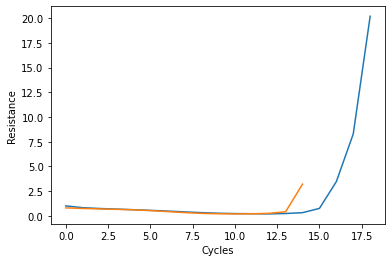

In [37]:
paths = yaml.load(open('../../../paths.yaml', 'r'), Loader=yaml.FullLoader)

DATA_FOLDER = paths['data'] + '2021-08-post-mortem-biologic-pc/'
FILE_GROUP_REGEX_LIST = ['*coin*cell2*hppc*.mpt*']
## sorts every file that has coin and hppc in the folder. datafolder is a path to the folder 
file_paths = [sorted(glob.glob(f'{DATA_FOLDER}{f}')) for f in FILE_GROUP_REGEX_LIST]
plt.figure()
plt.xlabel('Cycles')
plt.ylabel('Resistance')
for files in file_paths[0]:
    k=np.where(file_paths[0]== files)
    num_header_lines = 106

    df = pd.read_csv(files, header=num_header_lines, sep='\t', encoding='ISO-8859-1')
    if df.columns[0]!='mode':
        df=pd.read_csv(files, header=num_header_lines-1 , sep='\t', encoding='ISO-8859-1')
    if df.columns[0]!='mode':
        df=pd.read_csv(files, header=num_header_lines-2 , sep='\t', encoding='ISO-8859-1')
    if df.columns[0]!='mode':
        df=pd.read_csv(files, header=num_header_lines-3 , sep='\t', encoding='ISO-8859-1')
    if df.columns[0]!='mode':
        df=pd.read_csv(files, header=num_header_lines-5 , sep='\t', encoding='ISO-8859-1')
    cycles_num=np.unique(df['cycle number'])
    Ohm= HppcResist(df)
    plt.plot(range(int(Ohm[0])), Ohm[1:-1], label=k)
    



In [143]:
for file1 in file_paths[0]:
    num_header_lines = 106
    applied_current = applied_current_ma_vec[0]
    is_cathode = is_cathode_vec[0]
    name = name_vec[0]
    df = pd.read_csv(file1, header=num_header_lines, sep='\t', encoding='ISO-8859-1')
    if df.columns[0]!='mode':
        df=pd.read_csv(file1, header=num_header_lines-1 , sep='\t', encoding='ISO-8859-1')
    if df.columns[0]!='mode':
        df=pd.read_csv(file1, header=num_header_lines-2 , sep='\t', encoding='ISO-8859-1')
    if df.columns[0]!='mode':
        df=pd.read_csv(file1, header=num_header_lines-3 , sep='\t', encoding='ISO-8859-1')
    if df.columns[0]!='mode':
        df=pd.read_csv(file1, header=num_header_lines-5 , sep='\t', encoding='ISO-8859-1')
    print(df)
#    VoltageCurrent(df, file1)
#    Resistance(df)

       mode  ox/red  error  control changes  Ns changes  counter inc.  Ns  \
0         3       0      0                0           0             0   0   
1         3       0      0                0           0             0   0   
2         3       0      0                0           0             0   0   
3         3       0      0                0           0             0   0   
4         3       0      0                0           0             0   0   
...     ...     ...    ...              ...         ...           ...  ..   
12433     3       0      0                1           0             1  11   
12434     3       0      0                1           0             1  11   
12435     3       0      0                1           0             1  11   
12436     3       0      0                1           0             1  11   
12437     3       0      0                1           0             1  11   

       I Range         time/s  control/V/mA  ...  Q discharge/mA.h  \
0    